In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from ast import literal_eval
import re
from matplotlib_venn import venn3
from matplotlib_venn import venn2

In [2]:
def HLA_cd8_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace(",", "").replace("'","").split(" ")

def cdr3_lst_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")
    
def umi_lst_converter(x):
    #define format of datetime
    if x == x:
        print(x)
        return literal_eval(x)

def epitope_converter(x):
    #define format of datetime
    return [y for y in x.replace("[","").replace("]","").replace("\n","").split("'") if (y != '') & (y != ' ')]

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("\n","").replace("'",""))

converters = {'peptide_HLA_lst': peptide_hla_converter,'epitope_lst': epitope_converter,
              'cdr3_lst_TRA': cdr3_lst_converter,
              'HLA_lst_mhc': cdr3_lst_converter,'HLA_cd8': HLA_cd8_converter} #'umi_count_lst_mhc': literal_eval,

In [123]:
dct = {'A4000B303':'S1', 'A4000B304':'S2','A4000B305':'S3','A4000B306':'S4',
       'A1072B309':'S1', 'A1072B310':'S2','A1072B313':'S3','A1072B314':'S4'}

# Input

In [23]:
INPUT = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.imputed.csv'

In [4]:
MAP = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_MHC_IONTORRENT/mapping/KMA-1t1/output/mapping.clean.AKB.augmented.gz'

In [5]:
SPEC = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_MHC_IONTORRENT/barcode_library/barcode_specificity_annotations.xlsx'

# Load

In [6]:
sp_df = pd.read_excel(SPEC, sheet_name='CDX')

In [24]:
df = pd.read_csv(INPUT, converters=converters)

In [25]:
df['umi_count_lst_mhc'] = df.umi_count_lst_mhc.dropna().apply(lambda x: literal_eval(x))

In [41]:
df['template_id_cd8'] = df.template_id_cd8.str.split('_', expand=True)[0]

In [125]:
df['co_sample'] = df.set_index('template_id_cd8').index.map(dct)

In [45]:
map_df = pd.read_csv(MAP)
map_df['template_id_cd8'] = map_df.template_id_cd8.str.split('_', expand=True)[0]

# Heads

In [120]:
sp_df

,Barcode,sample_id,HLA_A,HLA_B,HLA_C,comment
0,A4000B303,BC-317_AB,"A0101, A3201","B0702, B1401","C0702, C0802",PBMC
1,A4000B304,BC-328_AB,"A0301, A2402","B0702, B0801","C0701, C0702",PBMC
2,A4000B305,BC-329_AB,"A0201, A2501","B0702, B3501","C0401, C0702",PBMC
3,A4000B306,BC-337_AB,"A0201, A0301","B1402, B4001","C0304, C0802",PBMC
4,A1072B309,BC-317,"A0101, A3201","B0702, B1401","C0702, C0802",PBMC
5,A1072B310,BC-328,"A0301, A2402","B0702, B0801","C0701, C0702",PBMC
6,A1072B313,BC-329,"A0201, A2501","B0702, B3501","C0401, C0702",PBMC
7,A1072B314,BC-337,"A0201, A0301","B1402, B4001","C0304, C0802",PBMC


In [126]:
df

,gem,clonotype,num_clonotype,ct,genes_TRA,genes_TRB,genes_lst_TRA,genes_lst_TRB,length_TRA,cdr3_TRA,...,binding_concordance,imputed_TRA,imputed_TRB,imputed_PEP,imputed_CDX,imputed_umi_TRA,imputed_umi_TRB,imputed_umi_PEP,imputation_category,co_sample
0,AAACCTGAGAGGTAGA-1,clonotype2,2.0,1,TRAV16;TRAJ47;TRAC,TRBV7-3;;TRBJ2-1;TRBC2,['TRAV16;TRAJ47;TRAC'],['TRBV7-3;;TRBJ2-1;TRBC2'],509.0,CALRDMEYGNKLVF,...,0.684404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAACCTGAGCACCGTC-1,clonotype1,1.0,2,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],505.0,CAASQNEKLTF,...,0.321814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S3
2,AAACCTGAGGAGCGTT-1,clonotype1,1.0,2,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],514.0,CAASQNEKLTF,...,0.215983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAACCTGAGTCGAGTG-1,clonotype4,4.0,4,TRAV39;TRAJ28;TRAC,TRBV4-2;;TRBJ2-7;TRBC2,['TRAV39;TRAJ28;TRAC'],['TRBV4-2;;TRBJ2-7;TRBC2'],487.0,CAVTAPAYSGAGSYQLTF,...,0.885714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unique,NaN
4,AAACCTGCATACTACG-1,clonotype256,256.0,314,TRAV12-2;TRAJ20;TRAC,TRBV5-8;TRBD1;TRBJ1-4;TRBC1,['TRAV12-2;TRAJ20;TRAC'],['TRBV5-8;TRBD1;TRBJ1-4;TRBC1'],541.0,CAVNSKGYKLSF,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unique,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,TTGGAACGTAACGACG-1,clonotype2,2.0,8,NaN,TRBV7-3;;TRBJ2-1;TRBC2,NaN,['TRBV7-3;;TRBJ2-1;TRBC2'],NaN,NaN,...,0.229167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2434,TTTATGCGTCGGATCC-1,clonotype18,18.0,42,NaN,TRBV7-9;;TRBJ2-7;TRBC2,NaN,['TRBV7-9;;TRBJ2-7;TRBC2'],NaN,NaN,...,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2435,TTTCCTCAGCACGCCT-1,clonotype6,6.0,22,NaN,TRBV19;;TRBJ2-2;TRBC2,NaN,['TRBV19;;TRBJ2-2;TRBC2'],NaN,NaN,...,0.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2436,TTTCCTCTCGGTCTAA-1,clonotype4,4.0,5,NaN,TRBV4-2;;TRBJ2-7;TRBC2,NaN,['TRBV4-2;;TRBJ2-7;TRBC2'],NaN,NaN,...,0.813187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
map_df

,gem,template_id_mhc,template_lst_mhc,single_barcode_mhc,umi_count_mhc,umi_count_lst_mhc,read_count_mhc,read_count_lst_mhc,multiplets_mhc,delta_umi_mhc,...,HLA_match,HLA_mhc,HLA_lst_mhc,likely_HLA_mhc,peptide,peptide_lst,peptide_HLA,peptide_HLA_lst,epitope,epitope_lst
0,AAACCTGAGAGGTAGA-1,A1072B315_sample,['A1073B307_sample' 'A1077B303_sample' 'A1072B...,False,68.0,"[1, 1, 1, 2, 3, 68]",228.0,"[3, 1, 1, 2, 3, 228]",6.0,20.0,...,NaN,B0801,['A0201' 'A0101' 'B0801'],NaN,RAKFKQLL,['ALPGVPPV' 'RQAYLTNQY' 'VTEHDTLLY' 'EERQAYLTN...,RAKFKQLL B0801,['ALPGVPPV A0201' 'RQAYLTNQY A0101' 'VTEHDTLLY...,V17_B8 EBV BZLF1 (C9),['06_1_1' '45_1_49' 'V15_A1 CMV pp50 VTE' '...
1,AAACCTGAGAGTAGCC-1,A1072B315_sample,['A1072B315_sample'],True,1.0,[1],3.0,[3],1.0,4.0,...,NaN,B0801,['B0801'],NaN,RAKFKQLL,['RAKFKQLL'],RAKFKQLL B0801,['RAKFKQLL B0801'],V17_B8 EBV BZLF1 (C9),['V17_B8 EBV BZLF1 (C9)']
2,AAACCTGAGCACCGTC-1,A1072B303_sample,['A1073B313_sample' 'A1075B313_sample' 'A1072B...,False,2.0,"[1, 1, 2]",2.0,"[1, 1, 2]",3.0,1.0,...,False,A0101,['B0702' 'A0101'],NaN,VTEHDTLLY,['GPFPGNLVD' 'WAGGLGLNL' 'VTEHDTLLY'],VTEHDTLLY A0101,['GPFPGNLVD B0702' 'WAGGLGLNL B0702' 'VTEHDTLL...,V15_A1 CMV pp50 VTE,['47_1_38' '47_1_62' 'V15_A1 CMV pp50 VTE']
3,AAACCTGAGGAGCGTT-1,A1072B315_sample,['A1072B315_sample'],True,2.0,[2],2.0,[2],1.0,8.0,...,NaN,B0801,['B0801'],NaN,RAKFKQLL,['RAKFKQLL'],RAKFKQLL B0801,['RAKFKQLL B0801'],V17_B8 EBV BZLF1 (C9),['V17_B8 EBV BZLF1 (C9)']
4,AAACCTGAGTCGAGTG-1,A1072B303_sample,['A1072B303_sample'],True,1.0,[1],1.0,[1],1.0,4.0,...,NaN,A0101,['A0101'],NaN,VTEHDTLLY,['VTEHDTLLY'],VTEHDTLLY A0101,['VTEHDTLLY A0101'],V15_A1 CMV pp50 VTE,['V15_A1 CMV pp50 VTE']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,TGTCCCATCAGCGATT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5267,TTAACTCAGTGTTAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5268,TTCTTAGAGTTAAGTG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5269,TTGACTTAGGGAGTAA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plots

## GEMs per CDX barcode

Text(0.5, 1.0, 'CDX barcode annotations in raw mappings')

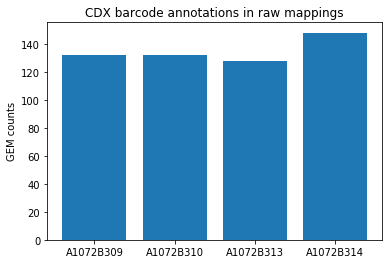

In [98]:
x = map_df.template_id_cd8.dropna().value_counts().sort_index()
plt.bar(x.index, x.values)
plt.ylabel('GEM counts')
plt.title('CDX barcode annotations in raw mappings')

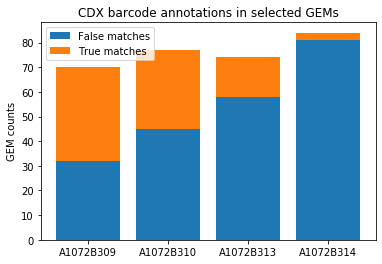

In [100]:
f = df[df.HLA_match == False].template_id_cd8.dropna().value_counts()
t = df[df.HLA_match == True].template_id_cd8.dropna().value_counts()

x = pd.concat([f,t], axis=1, sort=True)
x.columns = ['f','t']


plt.bar(x.index, x.f, label='False matches')
plt.bar(x.index, x.t, bottom=x.f, label='True matches')

plt.ylabel('GEM counts')
plt.title('CDX barcode annotations in selected GEMs')
plt.legend()

## HLA matching

In [127]:
df.groupby(['co_sample','template_id_cd8','peptide_HLA']).size()

co_sample  template_id_cd8  peptide_HLA      
S1         A1072B309        ALPGVPPV A0201        1
                            EERQAYLTNQY A0101     2
                            NLVPMVATV A0201       1
                            RAKFKQLL B0801       28
                            SIKDGLPPV A0201       1
                            TPRVTGGGAM B0702      6
                            VTEHDTLLY A0101      31
S2         A1072B310        DEYVHNTTA B0801       2
                            EERQAYLTNQY A0101     3
                            FLDTNQVVRI A0201      2
                            IHFDPGFEEQ A0101      1
                            NLVPMVATV A0201       1
                            RAKFKQLL B0801       23
                            RTMFWGPEV A0201       1
                            SLIIQFTSFV A0201      1
                            TPRVTGGGAM B0702     11
                            VTEHDTLLY A0101      32
S3         A1072B313        EERQAYLTNQY A0101     3
                  

In [128]:
df.groupby(['co_sample','template_id_cd8','HLA_mhc']).size()

co_sample  template_id_cd8  HLA_mhc
S1         A1072B309        A0101      32
                            A0201       4
                            B0702       6
                            B0801      28
S2         A1072B310        A0101      38
                            A0201       7
                            B0702      11
                            B0801      21
S3         A1072B313        A0101      37
                            A0201       4
                            B0702      12
                            B0801      21
S4         A1072B314        A0101      47
                            A0201       3
                            B0702      12
                            B0801      22
dtype: int64

In [50]:
sp_df

,Barcode,sample_id,HLA_A,HLA_B,HLA_C,comment
0,A4000B303,BC-317_AB,"A0101, A3201","B0702, B1401","C0702, C0802",PBMC
1,A4000B304,BC-328_AB,"A0301, A2402","B0702, B0801","C0701, C0702",PBMC
2,A4000B305,BC-329_AB,"A0201, A2501","B0702, B3501","C0401, C0702",PBMC
3,A4000B306,BC-337_AB,"A0201, A0301","B1402, B4001","C0304, C0802",PBMC
4,A1072B309,BC-317,"A0101, A3201","B0702, B1401","C0702, C0802",PBMC
5,A1072B310,BC-328,"A0301, A2402","B0702, B0801","C0701, C0702",PBMC
6,A1072B313,BC-329,"A0201, A2501","B0702, B3501","C0401, C0702",PBMC
7,A1072B314,BC-337,"A0201, A0301","B1402, B4001","C0304, C0802",PBMC


## UMI dist

Text(0.5, 1.0, 'Distribution of UMI per CDX barcode')

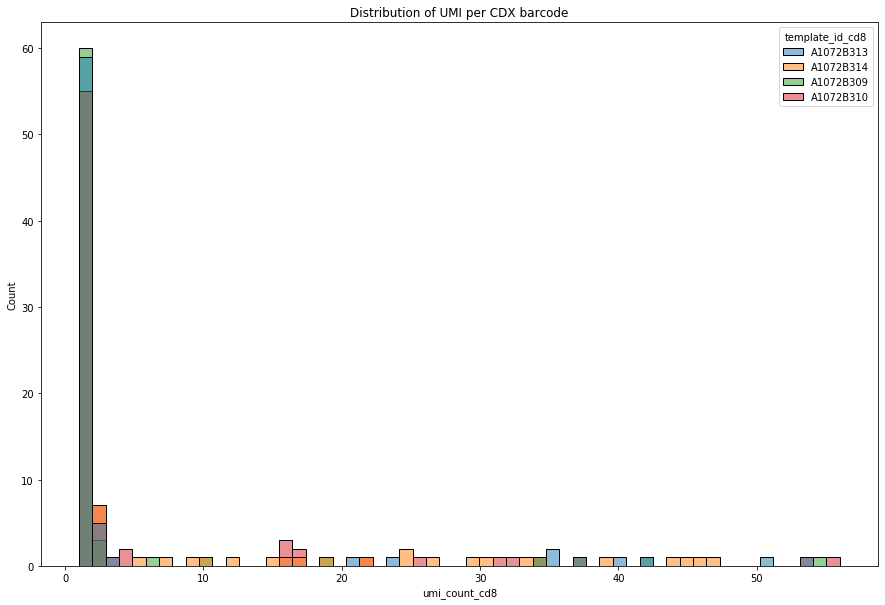

In [114]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='umi_count_cd8',hue='template_id_cd8', bins=int(df.umi_count_cd8.max())+1) #, element='step'
plt.title('Distribution of UMI per CDX barcode')

## HLA concordance

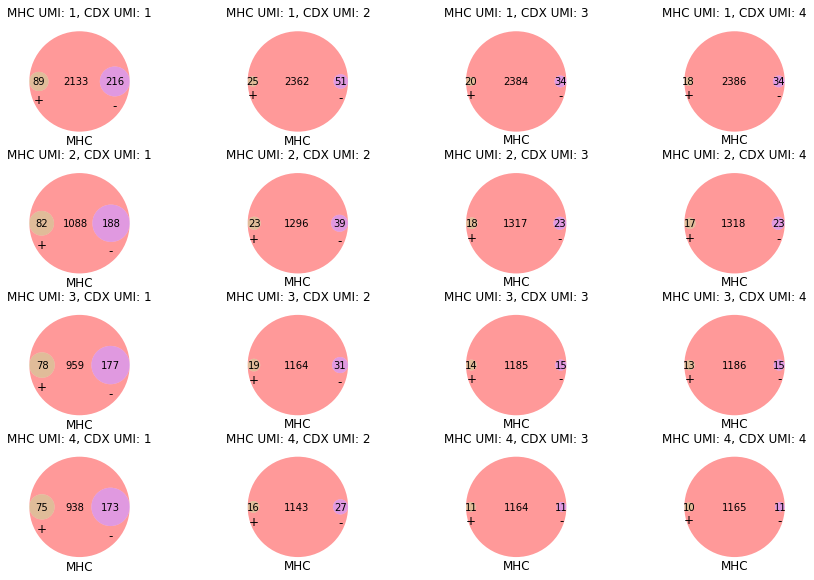

In [143]:
min_mhc = list(range(1,5))
min_cdx = list(range(1,5))

fig, axes = plt.subplots(len(min_cdx),len(min_mhc),figsize=(15,10))
for umi, axs in zip(min_mhc, axes):
    for um, ax in zip(min_cdx, axs):
        sub_df = df[(df.umi_count_mhc >= umi)].copy()
        
        # # Split data
        gem_mhc = sub_df[~sub_df.template_id_mhc.isna()].gem
        gem_cd8_t = sub_df[(sub_df.HLA_match == True) & (sub_df.umi_count_cd8 >= um)].gem
        gem_cd8_f = sub_df[(sub_df.HLA_match == False) & (sub_df.umi_count_cd8 >= um)].gem

        # # Plot
        a, b, c = set(gem_mhc), set(gem_cd8_t), set(gem_cd8_f)

        ab = a.intersection(b)
        ac = a.intersection(c)
        bc = b.intersection(c)

        abc = len(ab.intersection(c))
        ab_c = len(ab) - abc
        ac_b = len(ac) - abc
        bc_a = len(bc) - abc
        a_bc = len(a) - ab_c - ac_b - abc
        b_ac = len(b) - ab_c - bc_a - abc
        c_ab = len(c) - ac_b - bc_a - abc

        venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc),
              set_labels = ('MHC', '+', '-'), ax=ax)
        ax.set_title('MHC UMI: %d, CDX UMI: %d'%(umi, um))

title = "GEMs containing MHC and Ab BCs in HLA concordance"
#fig.suptitle(title)

In [69]:
map_df.columns

Index(['gem', 'template_id_mhc', 'template_lst_mhc', 'single_barcode_mhc',
       'umi_count_mhc', 'umi_count_lst_mhc', 'read_count_mhc',
       'read_count_lst_mhc', 'multiplets_mhc', 'delta_umi_mhc',
       'template_id_cd8', 'template_lst_cd8', 'single_barcode_cd8',
       'umi_count_cd8', 'umi_count_lst_cd8', 'read_count_cd8',
       'read_count_lst_cd8', 'detected_response', 'peptide_assayed',
       'sample_id', 'sample_id_lst', 'HLA_pool_cd8', 'HLA_lst_cd8', 'HLA_cd8',
       'HLA_match', 'HLA_mhc', 'HLA_lst_mhc', 'peptide', 'peptide_lst',
       'peptide_likely', 'peptide_HLA', 'peptide_HLA_lst', 'epitope',
       'epitope_lst'],
      dtype='object')

In [16]:
df.columns

Index(['gem', 'clonotype', 'num_clonotype', 'ct', 'genes_TRA', 'genes_TRB',
       'genes_lst_TRA', 'genes_lst_TRB', 'length_TRA', 'cdr3_TRA',
       'umi_count_TRA', 'umi_count_lst_TRA', 'delta_umi_TRA', 'cdr3_lst_TRA',
       'chain_count_TRA', 'single_TRA', 'length_TRB', 'cdr3_TRB',
       'umi_count_TRB', 'umi_count_lst_TRB', 'delta_umi_TRB', 'cdr3_lst_TRB',
       'chain_count_TRB', 'single_TRB', 'single_chain_only', 'umi_count_tcr',
       'cdr3_comb', 'tcr_category', 'no_filtration',
       'exclude_single-chain_TCRs', 'exclude_ambiguous_and_single-chain_TCRs',
       'template_id_mhc', 'template_lst_mhc', 'single_barcode_mhc',
       'umi_count_mhc', 'umi_count_lst_mhc', 'read_count_mhc',
       'read_count_lst_mhc', 'multiplets_mhc', 'delta_umi_mhc',
       'template_id_cd8', 'template_lst_cd8', 'single_barcode_cd8',
       'umi_count_cd8', 'umi_count_lst_cd8', 'read_count_cd8',
       'read_count_lst_cd8', 'detected_response', 'peptide_assayed',
       'sample_id', 'sample_id